In [9]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.widgets import Slider
import ect
# requires 'pip install ipympl'
%matplotlib notebook

<IPython.core.display.Javascript object>


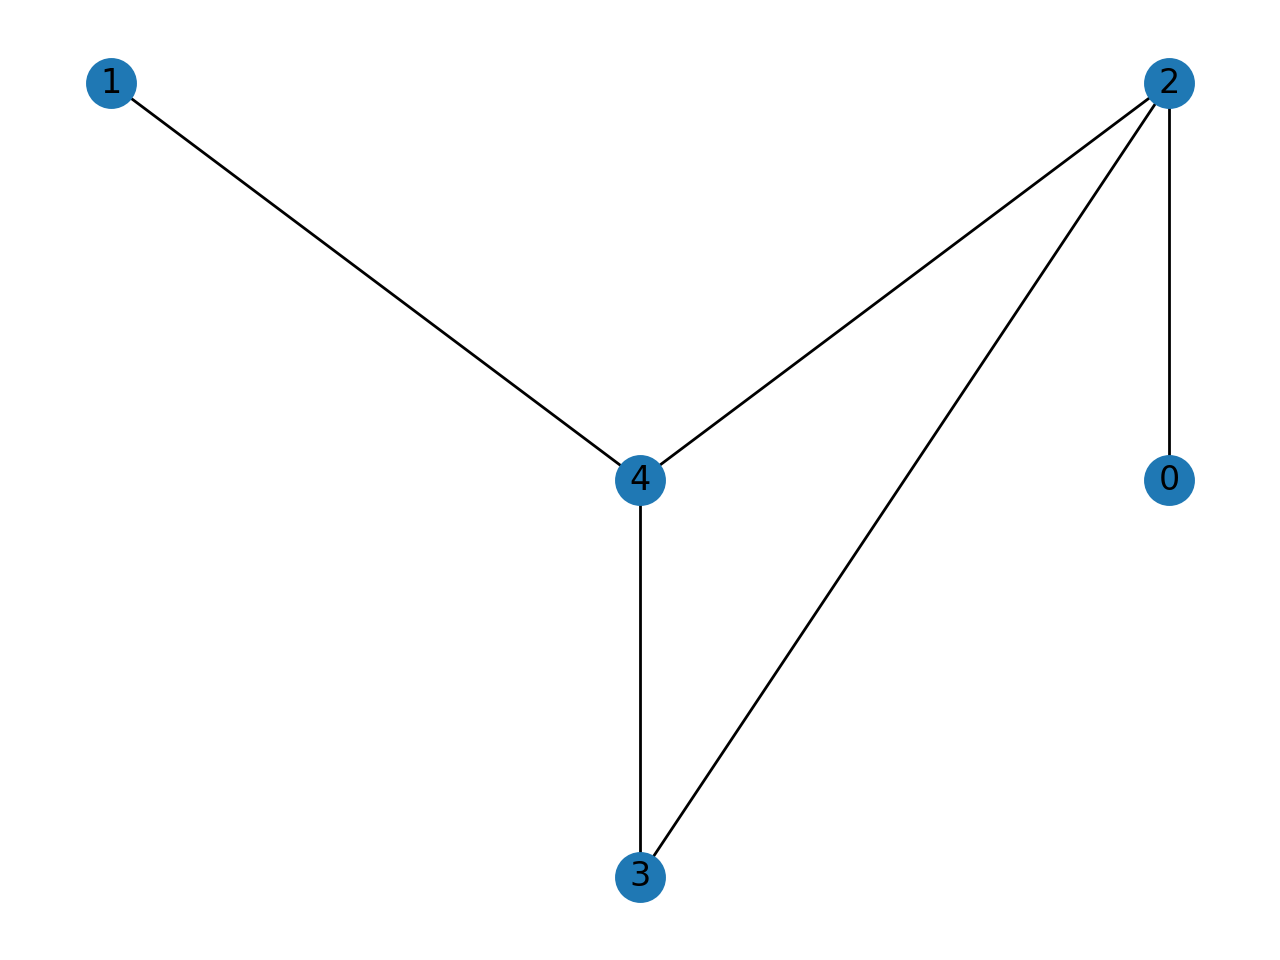

In [10]:
G = nx.Graph()

pos = {0: (4, 2), 1: (2, 3), 2: (4, 3), 3: (3, 1), 4 : (3, 2)}
G.add_nodes_from(pos.keys())

nx.set_node_attributes(G, pos, 'pos')

G.add_edges_from([(0, 2), (1, 4), (2, 4), (3, 4), (2, 3)])

nx.draw(G, nx.get_node_attributes(G, 'pos'), with_labels=True, ax = None)

<IPython.core.display.Javascript object>


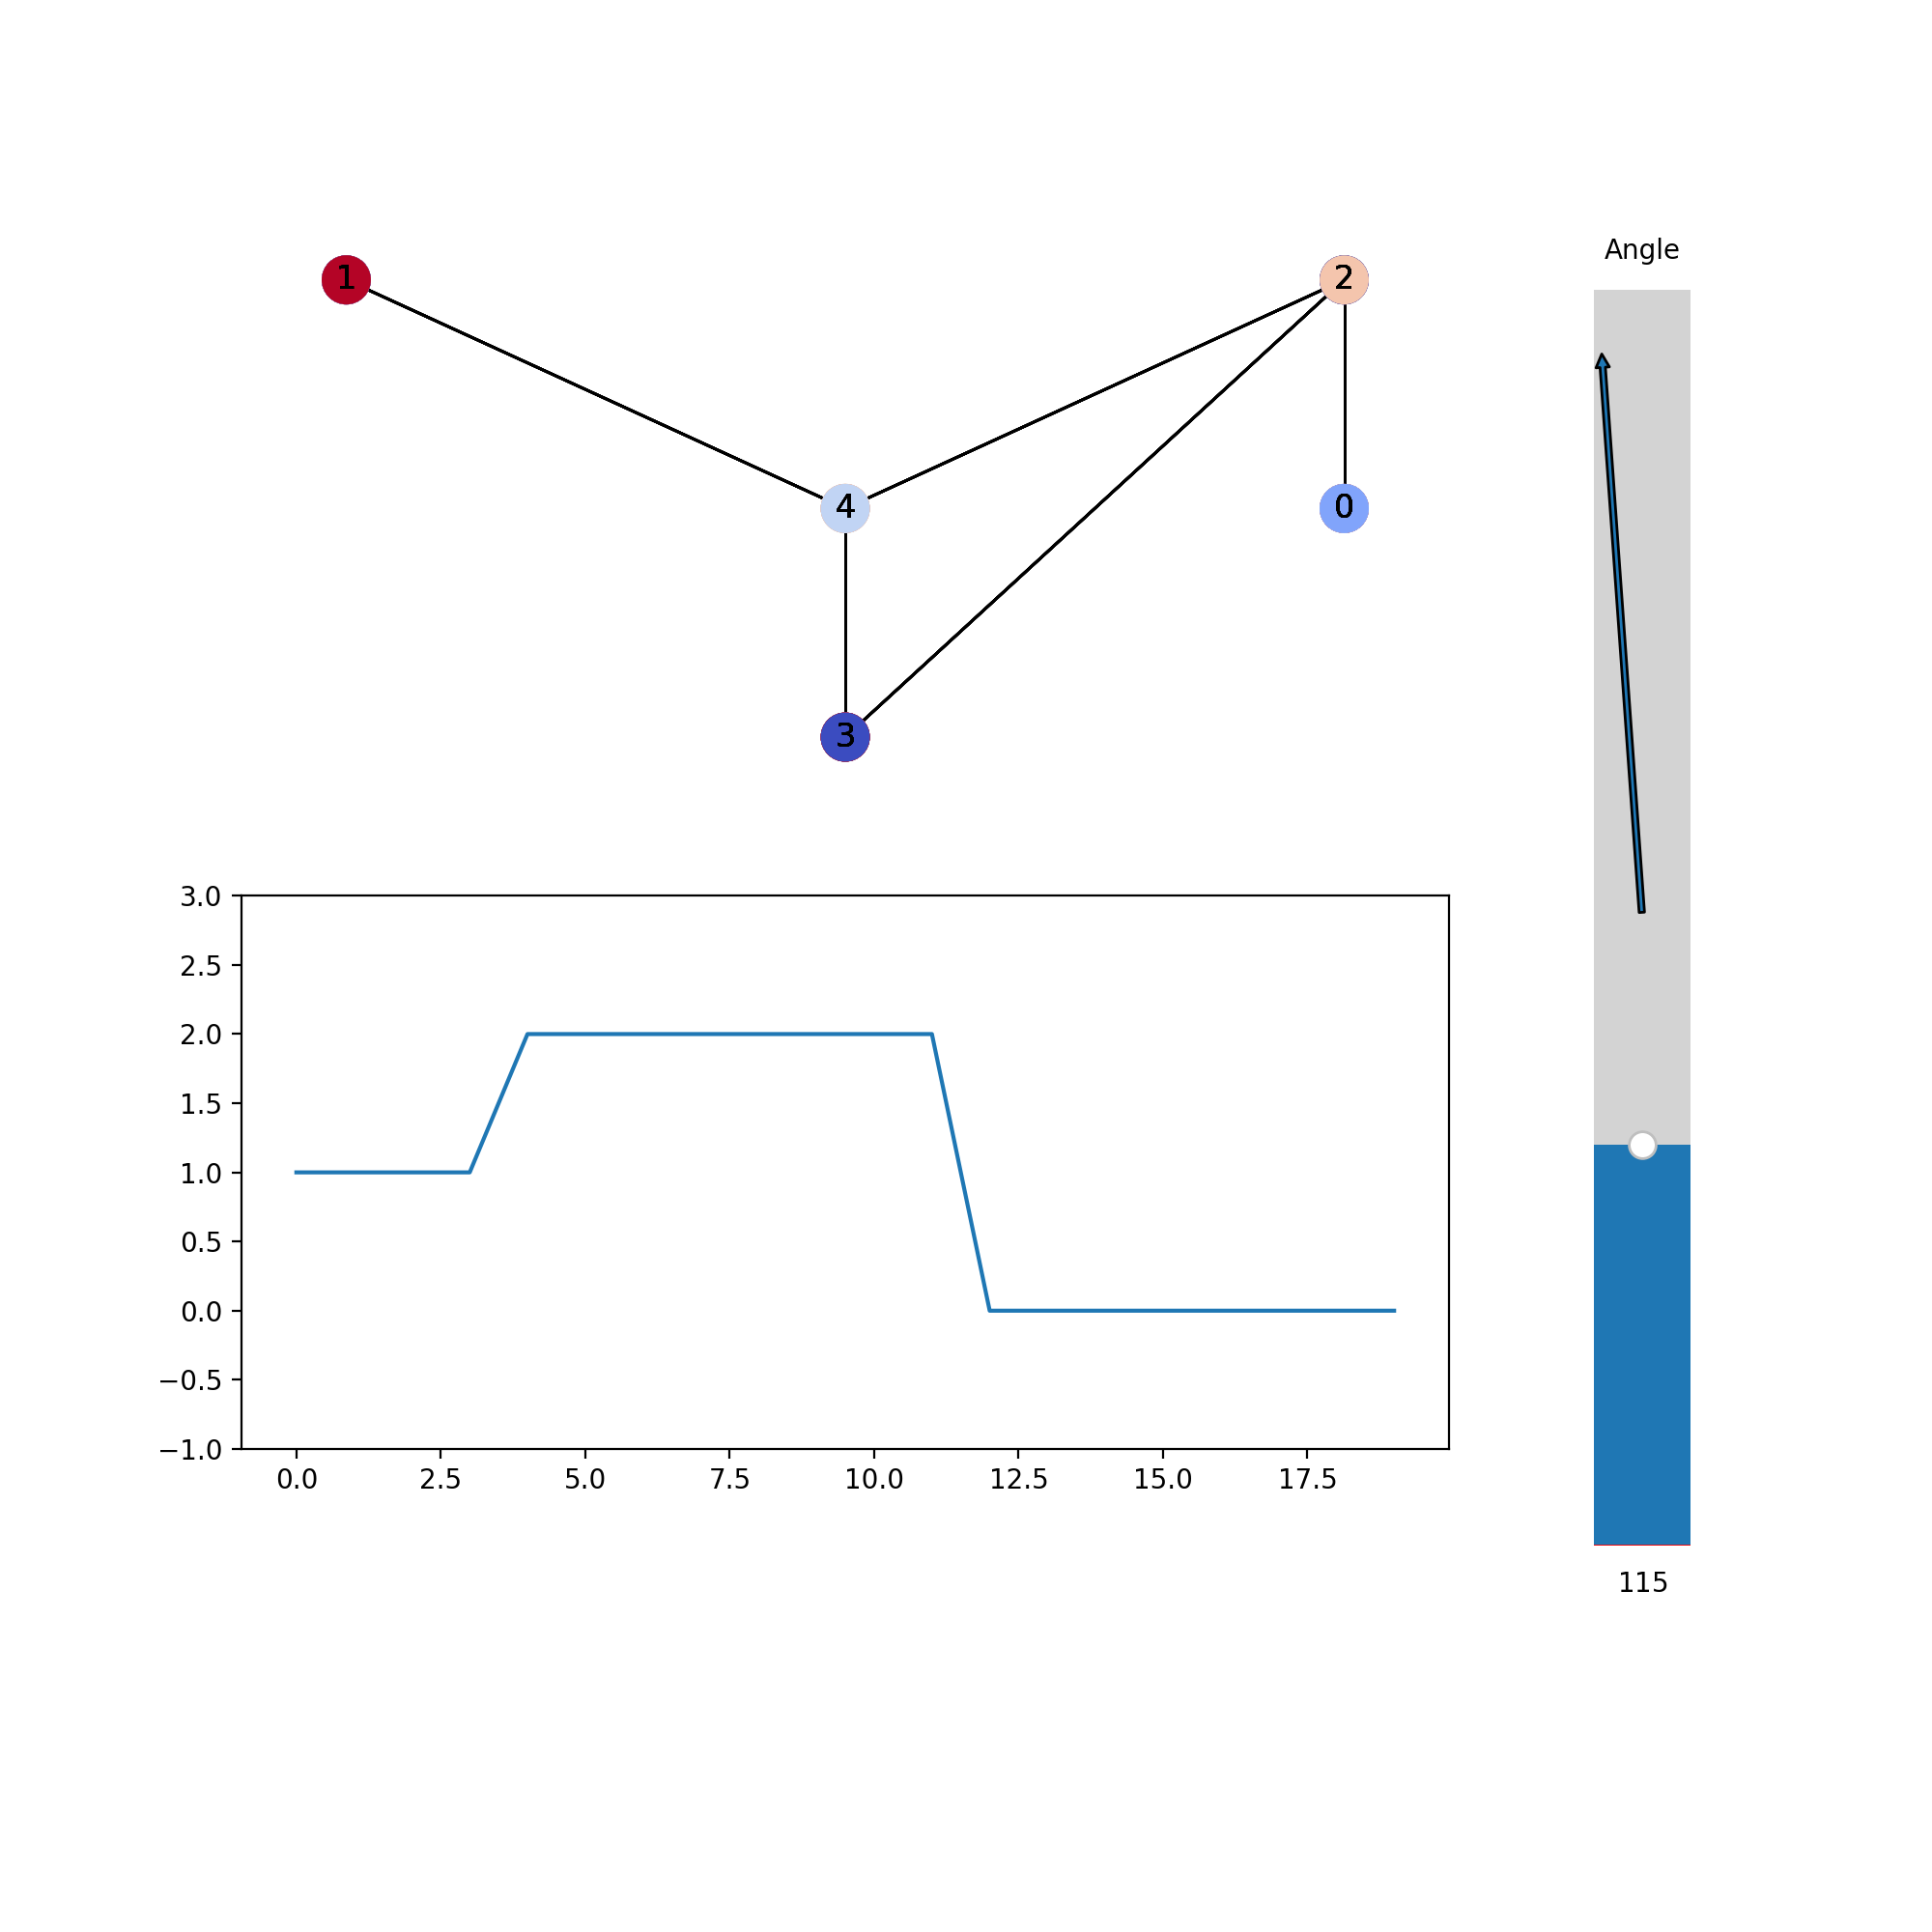

In [109]:
# DATA INITIALIZATION
theta = 0 
T = 20
ecc = ect.ECT(G, theta, T).flatten()

# FIGURE INITIALIZATION
fig, ax = plt.subplots(2, figsize = (10,10))
fig.subplots_adjust(bottom=0.25, right = 0.75)

ang_ax = fig.add_axes([0.8, 0.2, 0.1, 0.65])
ang_slider = Slider(
    ax=ang_ax,
    label="Angle",
    valmin=0,
    valmax=360,
    valinit=theta,
    valstep = 1,
    orientation = 'vertical'
)

# The function to be called anytime a slider's value changes
def update(val):
    # re-compute values
    theta = ang_slider.val * (2*np.pi/360)
    ecc = ect.ECT(G, theta, T).flatten()
    m, M = min(ecc), max(ecc)
    
    # update nx graph plot
    ect.plot_directional_distance(G, theta, ax = ax[0])
    
    # update ECC 
    line.set_data(np.arange(T), ecc)
    ax[1].set_ylim(m-1, M+1)
    
    ang_ax.patches.pop()
    # update arrow
    x_head = .5 + np.cos(theta)/2
    y_head = .5 + np.sin(theta)/2
    arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
                                     mutation_scale=10, transform=ang_ax.transAxes)
    ang_ax.add_patch(arrow)
    
    fig.canvas.draw_idle()
    return

# plot first frame
line, = ax[1].plot(ecc)

ect.plot_directional_distance(G, theta, ax = ax[0])

# arrow to tell direction
x_tail = .5
y_tail = .5
x_head = .5 + np.cos(theta)/2
y_head = .5 + np.sin(theta)/2
arrow = mpatches.FancyArrowPatch((x_tail, y_tail), (x_head, y_head),
                                 mutation_scale=10, transform=ang_ax.transAxes)
ang_ax.add_patch(arrow)

ang_slider.on_changed(update)

plt.show()